<a href="https://colab.research.google.com/github/formula008/ForTheFirstTimeWithPython/blob/main/13_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. 많이 본 뉴스 데이터 수집**

In [ ]:

#코드 13-1
import sys

!sudo add-apt-repository ppa:saiarcot895/chromium-beta
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser

!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [ ]:
#코드 13-2
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

webdriver_service = Service('/usr/bin/chromedriver')
driver = webdriver.Chrome(service = webdriver_service, options=options)
url = 'http://www.korea.kr/news/top50List.do'
driver.get(url)

In [ ]:
#코드 13-3
columns = ['순위', '기사 제목', '분류', '기사 작성일']
rank = []
title = []
journal = []
date = []
for i in range(1, 51):
    rank.append(i)
    title.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div > div >\
div.news_top50 > ul > li:nth-child(' + str(i) + ') > a > span.text >\
strong').text)
    journal.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div >\
div > div.news_top50 > ul > li:nth-child(' + str(i) +') > a >\
span.text > span.date > span:nth-child(1)').text)
    date.append(driver.find_element(By.CSS_SELECTOR, '#container > div > div > div >\
div.news_top50 > ul > li:nth-child(' + str(i) +') > a > span.text >\
span.date > span:nth-child(2)').text)

In [ ]:
#코드 13-4
import pandas as pd
df = pd.DataFrame({columns[0]: rank,
                   columns[1]: title,
                   columns[2]: journal,
                   columns[3]: date}, columns=columns)
df.head()

,순위,기사 제목,분류,기사 작성일
0,1,10월 2일 임시공휴일 지정…추석연휴 나흘간 고속도로 통행료 면제,정책뉴스,2023.08.31
1,2,"코로나 때 7% 넘는 대출 받은 자영업자, 최대 5.5% 금리로 갈아탄다",정책뉴스,2023.08.28
2,3,반값 국가기술자격시험·대중교통 K패스…실생활 보탬 되는 내년 이색사업,정책뉴스,2023.09.01
3,4,11일부터 수산물 할인률 40%…5만 원 이상 사면 2만 원 돌려받는다,정책뉴스,2023.09.01
4,5,내년 예산 2.8% 증가한 657조 원…허리띠 졸라매고 약자 위한 예산 늘렸다,정책뉴스,2023.08.29


In [ ]:
#코드 13-5
df.to_csv('top50_news.csv', index=False)

### **2. 많이 본 뉴스 워드클라우드**

In [ ]:
#코드 13-6
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,036 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122411 files and dire

In [ ]:
#코드 13-7
import csv

#CSV 파일 읽어오기
f = open('top50_news.csv', 'r')
rdr = csv.reader(f)
f.close

title = ''
for line in rdr:
  title = title + ' ' + line[1]
print(title)

 기사 제목 10월 2일 임시공휴일 지정…추석연휴 나흘간 고속도로 통행료 면제 코로나 때 7% 넘는 대출 받은 자영업자, 최대 5.5% 금리로 갈아탄다 반값 국가기술자격시험·대중교통 K패스…실생활 보탬 되는 내년 이색사업 11일부터 수산물 할인률 40%…5만 원 이상 사면 2만 원 돌려받는다 내년 예산 2.8% 증가한 657조 원…허리띠 졸라매고 약자 위한 예산 늘렸다 해수부, 일 오염수 방류 후 첫 방사능 조사…“우리 해역 안전” 정부 “오염수 방출 지점 3㎞ 이내 삼중수소 농도, 기준치 아래” 세계 3대 창업 대국으로 도약…2027년 벤처투자 14조 2000억 원으로 확대 정부 “오염수 방류, 당초 계획과 달리 진행되면 국제분쟁절차로 문제 제기” [적극행정 국민추천] 우리 주변의 자랑스러운 공무원을 추천해 주세요 내년 ‘약자복지’ 더욱 강화…노인일자리 역대 최고 수준으로 빚 많은 14개 공공기관, 2026년까지 부채 42조 원 줄인다 31일부터 ‘추석맞이 농축수산물 할인대전’…최대 60% 할인 반려동물 불법영업 뿌리 뽑는다…생산업 부모견 등록제 도입 모든 학생선수 학습권 보장한다…‘e-스쿨’ 초등 선수까지 확대 [정책 바로보기] 올 추석 청탁금지법, ‘커피 교환권’은 되고 ‘백화점 상품권’은 안된다 미술에 빠진 대한민국…‘2023 미술주간’ 9월 1~11일까지 방사능 검사 장비 올해 말까지 43대로 확대…지역별 감시망 구축 9월 1일부터 ‘비대면진료’ 시범사업 본격 시행…계도기간 종료 [장미란의 정들어TV] ‘먹잘알’ 장미란 차관이 들려주는 ‘문화관광축제 지원 사업’ [일상공감365] 여름이 지나면 우리 마음도 좀 더 넉넉해질까요? ‘지진국민행동요령’ 영상을 시청하던 내가 소설 속 엑스트라로 눈을 떴다? ‘공직인사 청년자문단’ 확대…경찰관·소방관 등 현장 공무원 참여 추석 맞이 중소기업·소상공인에 7조 2000억 원 유동성 공급 기초·차상위 계층 모든 대학생 자녀 등록금 전액 지원 코로나19 ‘4급 전환’…고위험군 보호 위해 치료제는 계속 ‘무상’ 지원 맛

In [ ]:
#코드 13-8
#인덱스 0~5를 제외하고 6부터 슬라이싱하기
title = title[6:]
print(title)

 10월 2일 임시공휴일 지정…추석연휴 나흘간 고속도로 통행료 면제 코로나 때 7% 넘는 대출 받은 자영업자, 최대 5.5% 금리로 갈아탄다 반값 국가기술자격시험·대중교통 K패스…실생활 보탬 되는 내년 이색사업 11일부터 수산물 할인률 40%…5만 원 이상 사면 2만 원 돌려받는다 내년 예산 2.8% 증가한 657조 원…허리띠 졸라매고 약자 위한 예산 늘렸다 해수부, 일 오염수 방류 후 첫 방사능 조사…“우리 해역 안전” 정부 “오염수 방출 지점 3㎞ 이내 삼중수소 농도, 기준치 아래” 세계 3대 창업 대국으로 도약…2027년 벤처투자 14조 2000억 원으로 확대 정부 “오염수 방류, 당초 계획과 달리 진행되면 국제분쟁절차로 문제 제기” [적극행정 국민추천] 우리 주변의 자랑스러운 공무원을 추천해 주세요 내년 ‘약자복지’ 더욱 강화…노인일자리 역대 최고 수준으로 빚 많은 14개 공공기관, 2026년까지 부채 42조 원 줄인다 31일부터 ‘추석맞이 농축수산물 할인대전’…최대 60% 할인 반려동물 불법영업 뿌리 뽑는다…생산업 부모견 등록제 도입 모든 학생선수 학습권 보장한다…‘e-스쿨’ 초등 선수까지 확대 [정책 바로보기] 올 추석 청탁금지법, ‘커피 교환권’은 되고 ‘백화점 상품권’은 안된다 미술에 빠진 대한민국…‘2023 미술주간’ 9월 1~11일까지 방사능 검사 장비 올해 말까지 43대로 확대…지역별 감시망 구축 9월 1일부터 ‘비대면진료’ 시범사업 본격 시행…계도기간 종료 [장미란의 정들어TV] ‘먹잘알’ 장미란 차관이 들려주는 ‘문화관광축제 지원 사업’ [일상공감365] 여름이 지나면 우리 마음도 좀 더 넉넉해질까요? ‘지진국민행동요령’ 영상을 시청하던 내가 소설 속 엑스트라로 눈을 떴다? ‘공직인사 청년자문단’ 확대…경찰관·소방관 등 현장 공무원 참여 추석 맞이 중소기업·소상공인에 7조 2000억 원 유동성 공급 기초·차상위 계층 모든 대학생 자녀 등록금 전액 지원 코로나19 ‘4급 전환’…고위험군 보호 위해 치료제는 계속 ‘무상’ 지원 맛집서 식사하

In [ ]:
#코드 13-9
!pip install konlpy

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 34.9 MB/s eta 0:00:00


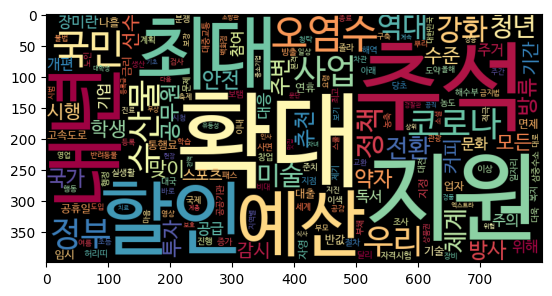

In [ ]:
#코드 13-10
#문자열 분석하기
okt = Okt()
nouns = okt.nouns(title)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)

#워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',\
               scale=2.0, colormap='Spectral')
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)